In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from yolo_helper import get_YOLO_V2_NN

Using TensorFlow backend.


# Tipos de entrenamiento:
### Solo clasificación
### Cambiar tamaños de imagenes de entrada
### Todo completo (Clasificación + bboxes + Confidence)
### Data augmentation
### Bajar LR 10 veces al final
### Cyclic Learning Rate
### Differencial Learning Rates

# Entrenamiento solo Classificación SIN aumentation

- 320x320
- Se entrena usando como loss solo la cross entropy apicada a las clases. El resto de las salidas (bounding box y confidence) se ignoran durante el entrenamiento
- Tiempo aprox por epoch con titanX: 20seg
- lr: 0.001
- Clases: 8

In [4]:
history = np.load('history_yolo_only_classif_NO_aumentation.npy').flat[0]

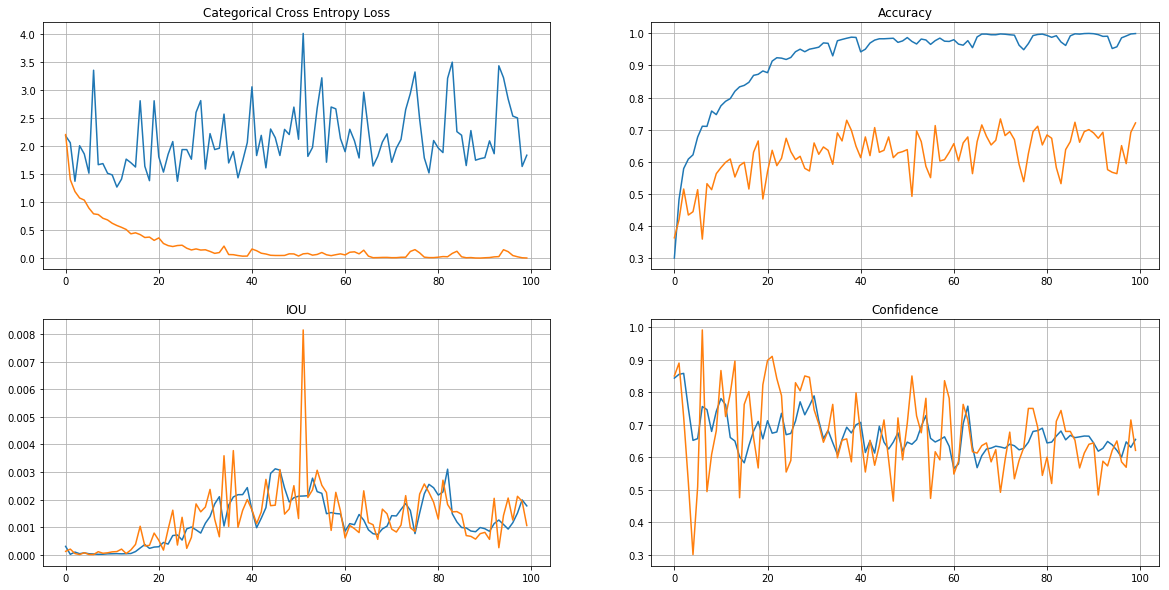

In [5]:
f, ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()
ax[0].plot(history['val_loss'])
ax[0].plot(history['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history['classes_acc'])
ax[1].plot(history['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
ax[2].plot(history['iou_metric'])
ax[2].plot(history['val_iou_metric'])
ax[2].set_title('IOU')
ax[2].grid()
ax[3].plot(history['confidence_acc_with_sigmoid'])
ax[3].plot(history['val_confidence_acc_with_sigmoid'])
ax[3].set_title('Confidence')
ax[3].grid()
plt.show()

# Entrenamiento solo Classificación con augmentation
- 320x320
- flip_hor, flip_ver, crop
- Se entrena usando como loss solo la cross entropy apicada a las clases. El resto de las salidas (bounding box y confidence) se ignoran durante el entrenamiento
- Tiempo aprox por epoch con titanX: 20seg
- lr: 0.001
- Clases: 8

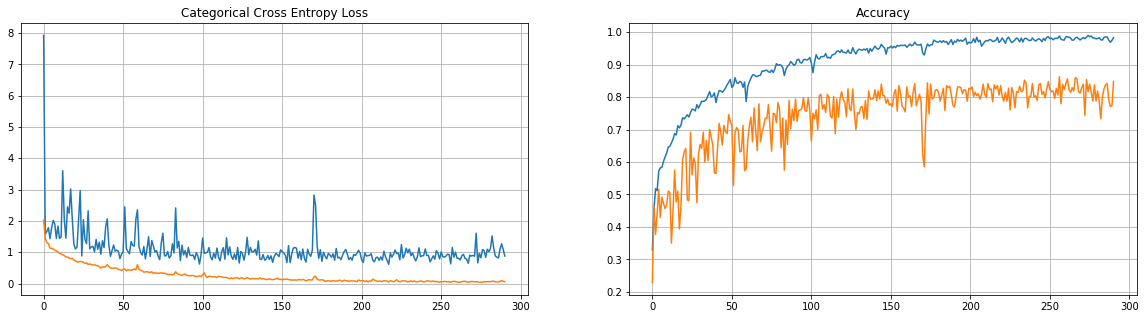

In [6]:
history_2 = np.load('history_yolo_only_classif_plus_aumentation.npy').flat[0]
f, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(history_2['val_loss'])
ax[0].plot(history_2['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_2['classes_acc'])
ax[1].plot(history_2['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
plt.show()

# Entrenando con clasificacion y bounding boxes

Mejora si solo lo usaramos para clasificar: Notar que a pesar de que class acc de train llega a 1 pero a las bboxes iou les falta. Al seguir teniendo capacidad de mejorar el mse de las bboxes eso mejora tambien la acc de val

- neg_confidence = 0.1
- el resto en 1

In [7]:
history_3 = np.load('history_yolo_loss_plus_aumentation.npy').flat[0]

In [8]:
history_3.keys()

dict_keys(['val_loss', 'val_negative_bin_cross_entropy_loss', 'val_classes_acc', 'val_confidence_acc_with_sigmoid', 'val_bounding_box_mse', 'val_iou_metric', 'val_positive_bin_cross_entropy_loss', 'val_categorical_cross_entropy_loss', 'loss', 'negative_bin_cross_entropy_loss', 'classes_acc', 'confidence_acc_with_sigmoid', 'bounding_box_mse', 'iou_metric', 'positive_bin_cross_entropy_loss', 'categorical_cross_entropy_loss'])

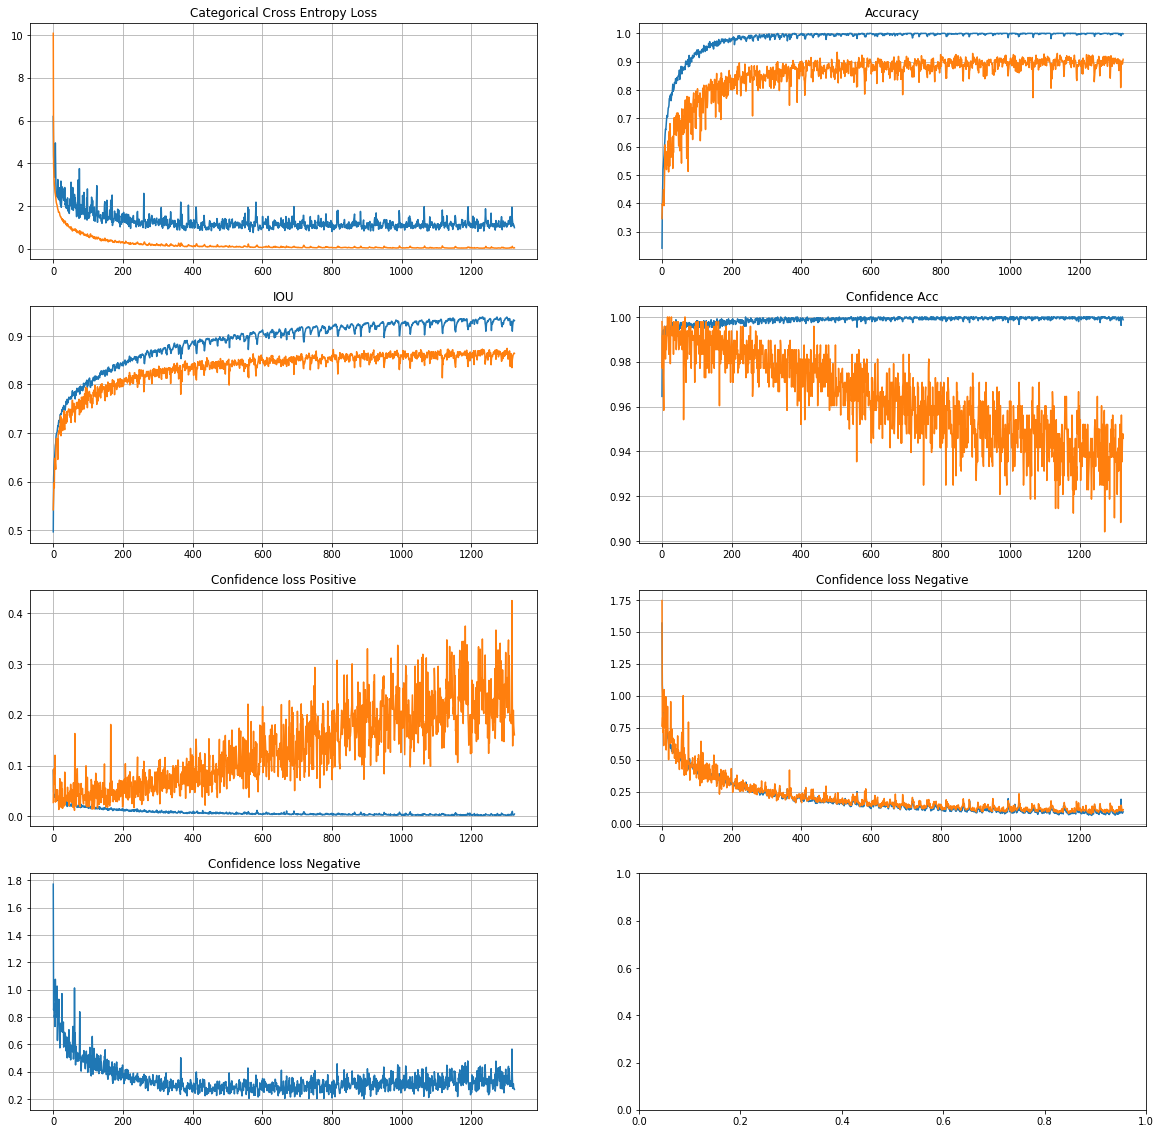

In [9]:
f, ax = plt.subplots(4,2, figsize=(20,20))
ax = ax.flatten()
ax[0].plot(history_3['val_loss'])
ax[0].plot(history_3['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_3['classes_acc'])
ax[1].plot(history_3['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
ax[2].plot(history_3['iou_metric'])
ax[2].plot(history_3['val_iou_metric'])
ax[2].set_title('IOU')
ax[2].grid()
ax[3].plot(history_3['confidence_acc_with_sigmoid'])
ax[3].plot(history_3['val_confidence_acc_with_sigmoid'])
ax[3].set_title('Confidence Acc')
ax[3].grid()
ax[4].plot(history_3['positive_bin_cross_entropy_loss'])
ax[4].plot(history_3['val_positive_bin_cross_entropy_loss'])
ax[4].set_title('Confidence loss Positive')
ax[4].grid()
ax[5].plot(history_3['negative_bin_cross_entropy_loss'])
ax[5].plot(history_3['val_negative_bin_cross_entropy_loss'])
ax[5].set_title('Confidence loss Negative')
ax[5].grid()
ax[6].plot(np.array(history_3['val_negative_bin_cross_entropy_loss']) + np.array(history_3['val_positive_bin_cross_entropy_loss']))
#ax[6].plot(history_3['val_negative_bin_cross_entropy_loss'])
ax[6].set_title('Confidence loss Negative')
ax[6].grid()
plt.show()


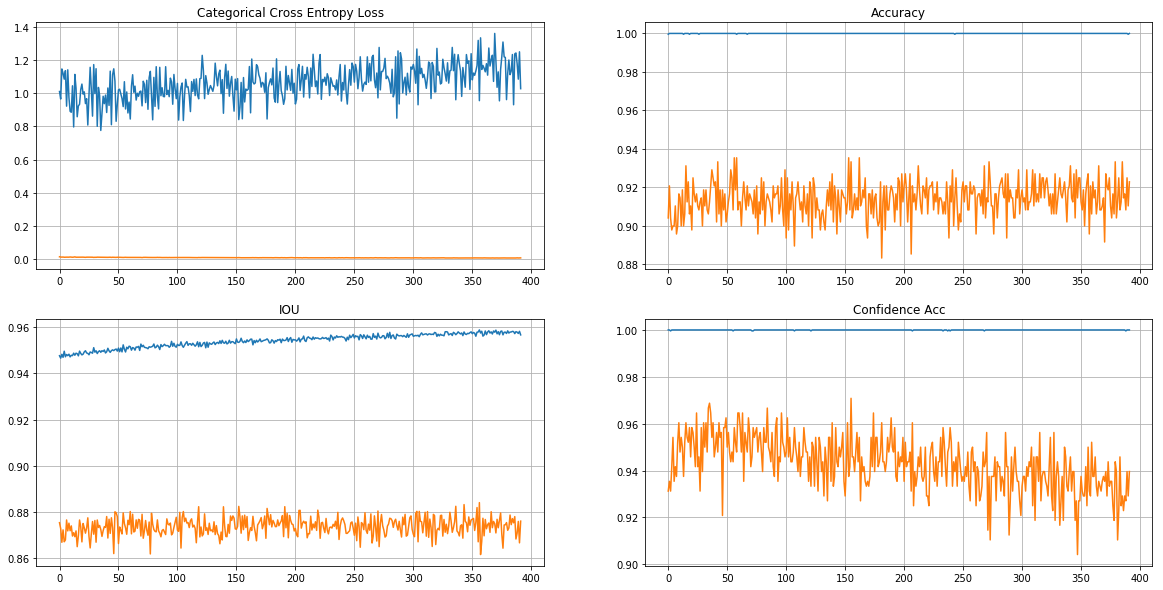

In [10]:
history_4 = np.load('history_yolo_loss_plus_aumentation_lambda_0.01.npy').flat[0]
f, ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()
ax[0].plot(history_4['val_loss'])
ax[0].plot(history_4['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_4['classes_acc'])
ax[1].plot(history_4['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
ax[2].plot(history_4['iou_metric'])
ax[2].plot(history_4['val_iou_metric'])
ax[2].set_title('IOU')
ax[2].grid()
ax[3].plot(history_4['confidence_acc_with_sigmoid'])
ax[3].plot(history_4['val_confidence_acc_with_sigmoid'])
ax[3].set_title('Confidence Acc')
ax[3].grid()

# Test con modelo

In [50]:
from PIL import Image
from yolo_helper import plot_batch_with_predictions, get_YOLO_V2_NN, plot_bboxes, getIUO
from Object_Detection import ObjectDectection
import numpy as np

In [12]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}

In [13]:
idx_2_class_id = {0: 'n02165456',
 1: 'n02226429',
 2: 'n01644373',
 3: 'n02279972',
 4: 'n01632458',
 5: 'n02256656',
 6: 'n01774384',
 7: 'n01770393'}

347 600


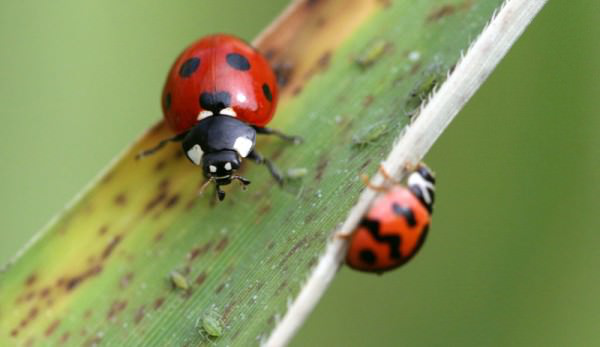

In [77]:
#image = Image.open('ladybug.jpeg')
image = Image.open('ladybugs.jpg')
#image = Image.open('ladybugs_3.jpg')
#image = Image.open('scorpion-black_widow.jpg')
#image = Image.open('ladybugs_lots.jpg')
#image = Image.open('ladybugs-swarm.jpg')
#image = Image.open('ladybugs_lots_2.jpg')
print(image.height, image.width)
image

In [78]:
from yolo_helper import get_YOLO_V2_NN
n_classes = len(classes_names)
GRID_H,  GRID_W  = int(np.round(image.height / 32)) , int(np.round(image.width / 32))
#GRID_H,  GRID_W  = 10 , 10
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)
print(IMAGE_H, IMAGE_W)
BOX = 1
CLASS = n_classes

# object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='VGG16')
#object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='VGG16')
model = object_detection.model

#model = get_YOLO_V2_NN(IMAGE_H, IMAGE_W, BOX, CLASS, GAP=False)
# Le pongo el mismo nombre que en el otro modelo para que asigne la loss bien
# model.layers[-1].name='concatenated_outputs'
model.layers[-1].output

352 608
Model trainable from layer block5_conv3


<tf.Tensor 'reshape_5/Reshape:0' shape=(?, 11, 19, 1, 13) dtype=float32>

In [79]:
#model.load_weights('weights_yolo_loss_plus_aumentation_lambda_0.01.hdf5')
#model.load_weights('weights_yolo_loss_plus_aumentation_lambda_0.01_2.hdf5')
#model.load_weights('weights_yolo_loss_plus_aumentation_lambda_0.01_3.hdf5')
#model.load_weights('weights_yolo_loss_plus_aumentation_focal_loss.hdf5') # No es focal loss en realidad
#model.load_weights('weights_yolo_focal_loss.hdf5') 
model.load_weights('weights_yolo_VGG16.hdf5') 

In [80]:
image_array = np.array(image.resize([IMAGE_W,IMAGE_H])).reshape(1, IMAGE_H, IMAGE_W, 3)/255

In [81]:
predictions = model.predict(image_array)

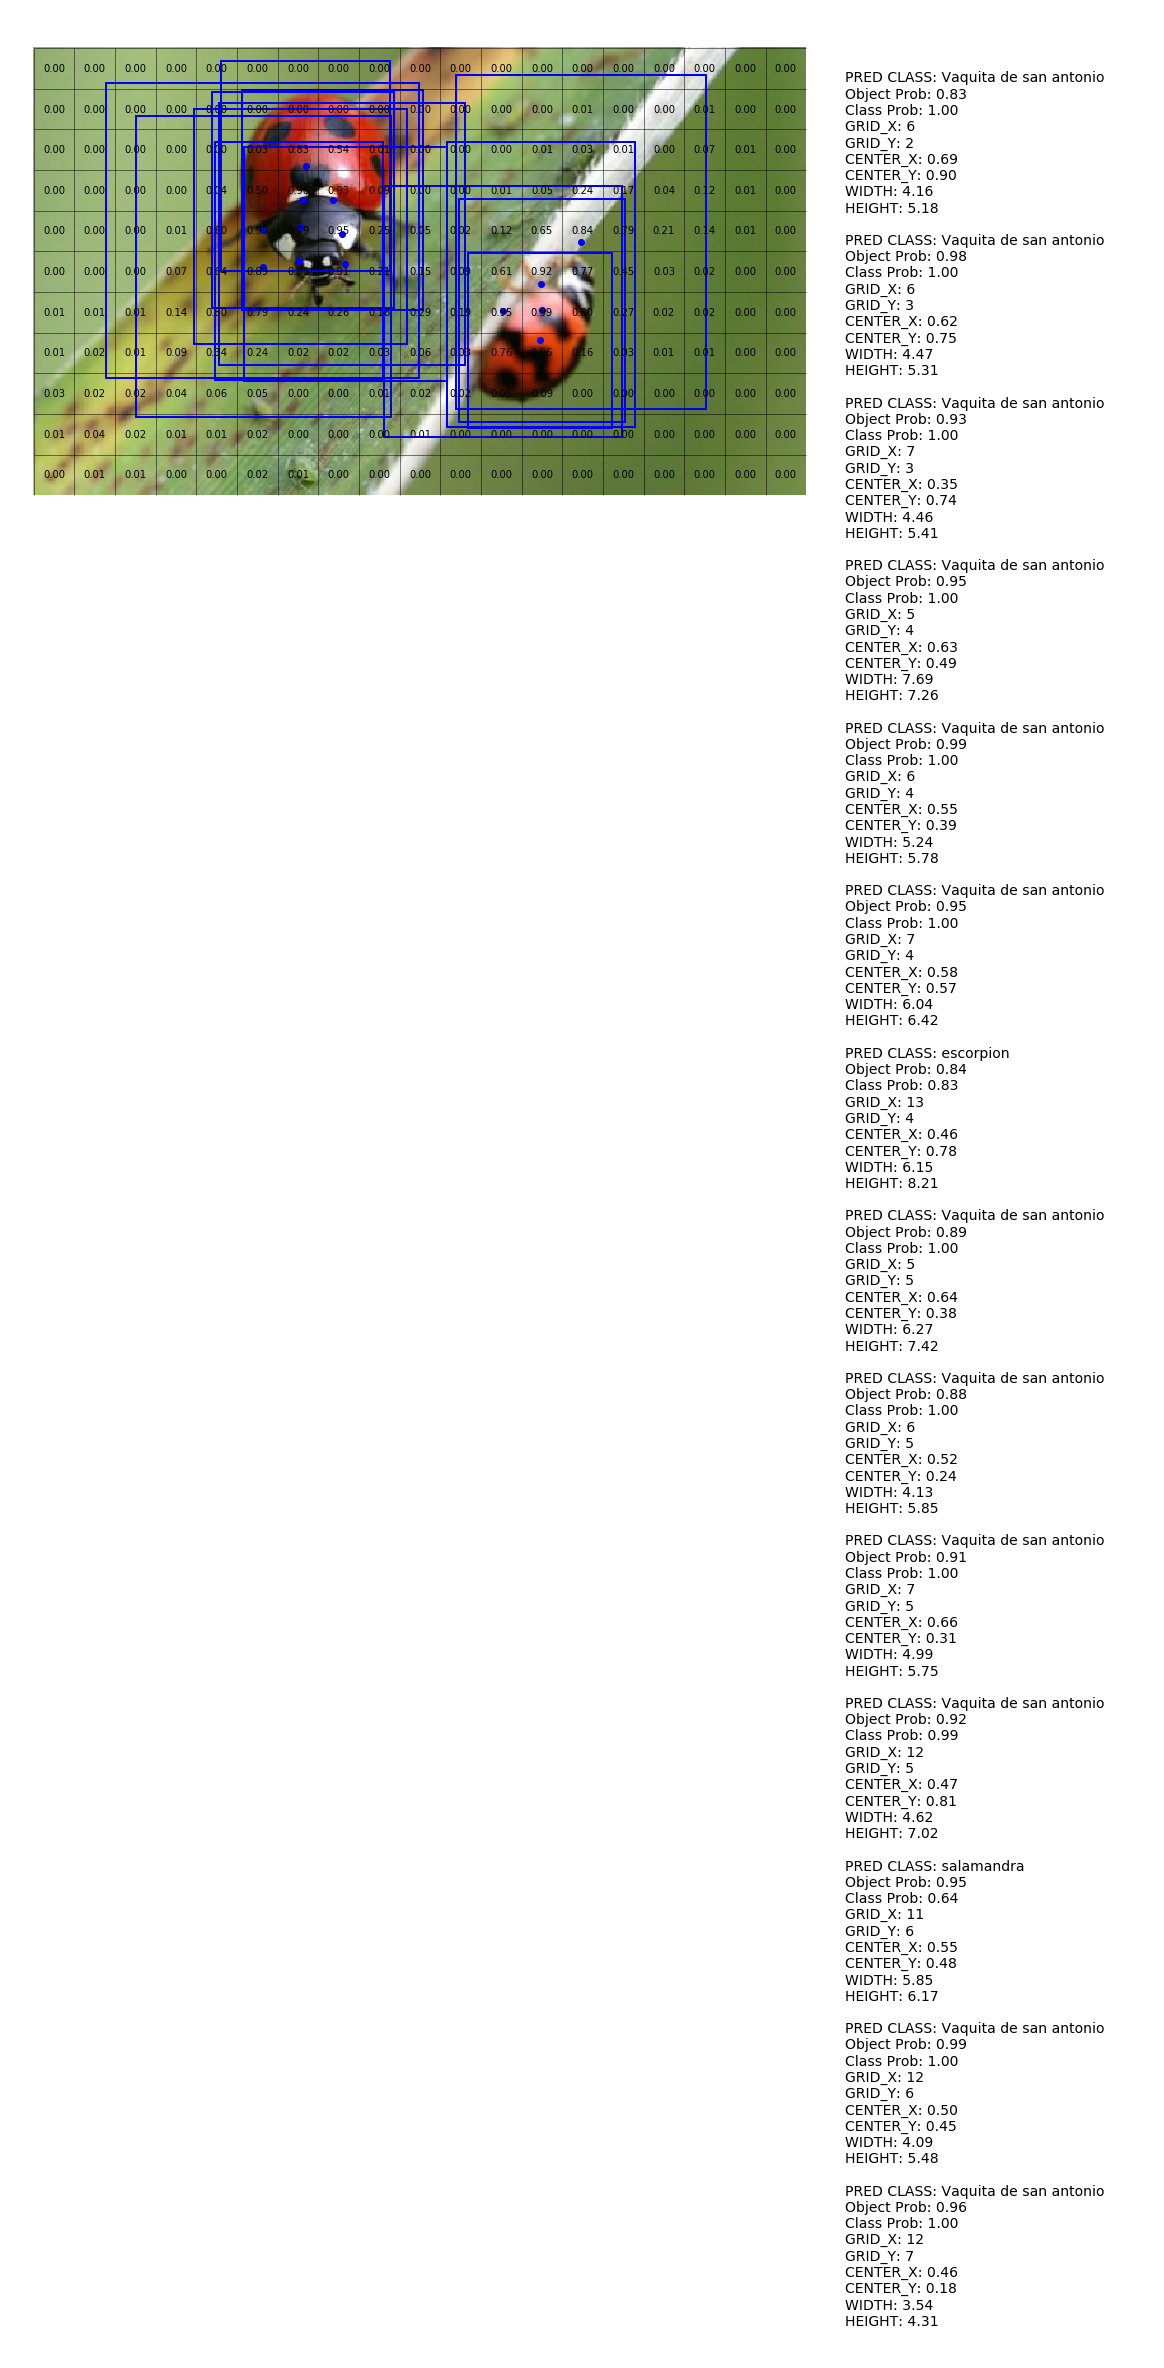

In [83]:
# 0.01 detecta grillo
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.8)

In [84]:
cl_probs = []
ob_probs = []
bboxes = [] 

for pr in pred_processed:
    cl_probs.append(pr['class_prob'])
    ob_probs.append(pr['obj_prob'])
    bboxes.append(pr['bbox'])
cl_probs = np.array(cl_probs)
ob_probs = np.array(ob_probs)
probab = cl_probs*ob_probs
bboxes = np.array(bboxes)

In [85]:
def get_remaining_boxes(bboxes, sel_box, probab):
    new_boxes = []
    new_probab = []
    for i, bbox in enumerate(bboxes):
        IOU, _ = getIUO(sel_box.reshape(1,4), bbox.reshape(1,4))
        if IOU<0.4:
            new_boxes.append(bbox)
            new_probab.append(probab[i])
    return new_boxes, new_probab

In [86]:
final_boxes = []
final_probs = []

In [87]:
while len(bboxes)>0:
    max_sel_idx = np.argmax(probab)
    final_boxes.append(bboxes[max_sel_idx])
    final_probs.append(probab[max_sel_idx])
    bboxes, probab = get_remaining_boxes(bboxes, bboxes[max_sel_idx], probab)

[334.4541626  118.67028809 465.44142151 294.16142273] 0.9920929784288738
[125.81488228  47.97862148 293.64926338 232.98359585] 0.9865280749133385


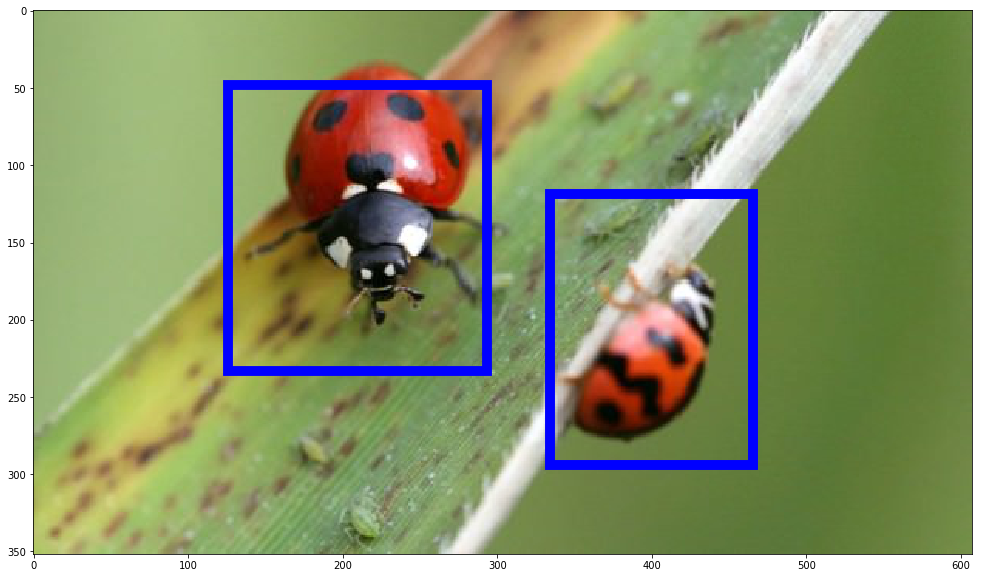

In [88]:
import matplotlib.patches as patches
f, axs = plt.subplots(1,1, figsize=(20,10))
ax = axs
ax.imshow(image_array[0])
for i, predicted_box in enumerate(final_boxes):
    print(predicted_box, final_probs[i])
    if final_probs[i]>0.2:
        pred_rect = patches.Rectangle([predicted_box[0], predicted_box[1]],
                                        predicted_box[2]-predicted_box[0],
                                        predicted_box[3]-predicted_box[1],
                                        linewidth=10*final_probs[i], edgecolor='b',facecolor='none')

        ax.add_patch(pred_rect)
    